
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining S&P 500 Sectors.  Construct portfolios from the S&P 500 Sector ETFs and examine the results of different weighting schemes.  In particular, we can select the best performing sectors over a given period.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['etf-galaxy']
risk_free_rate = 0
annual_returns = '1 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,SPY,S&P 500 ETF,US Stocks:Large Cap,-14.20,-0.90,18.71,13.74,15.44,12.56,8.13,16.72,18.71,1.12
1,DIA,DJIA ETF,US Stocks:Large Cap,-19.82,-6.20,14.72,11.93,12.26,11.02,7.15,16.50,14.72,0.89
2,QQQ,Nasdaq 100 ETF,US Stocks:Growth,-25.57,1.91,16.82,16.32,19.46,17.89,12.46,21.09,16.82,0.80
3,VTI,Vanguard Total Stock Market Index ETF,US Stocks:Total Stock Market,-19.71,-5.34,17.84,12.92,14.69,12.72,8.35,17.12,17.84,1.04
4,IWM,Russell 2000 ETF,US Stocks:Small Cap,-46.77,-37.78,6.46,5.03,7.93,16.37,11.23,22.96,6.46,0.28
5,MDY,S&P 400 Midcap ETF,US Stocks:Mid Cap,-39.11,-29.67,9.38,8.12,11.07,14.08,10.06,20.51,9.38,0.46
6,IWD,Russell 1000 Value ETF,US Stocks:Value,9.33,-7.41,16.07,9.34,10.76,9.38,5.49,16.68,16.07,0.96
7,IWF,Russell 1000 Growth ETF,US Stocks:Growth,-36.02,0.70,19.94,16.60,18.37,17.56,12.16,19.53,19.94,1.02
8,RSP,S&P 500 Equal Weight ETF,US Stocks:Growth,-4.10,-12.98,12.93,8.22,12.28,9.59,6.10,18.09,12.93,0.71
9,SPSM,S&P 600 Small Cap ETF,US Stocks:Small Cap,-48.89,-38.38,6.31,4.47,9.37,15.91,11.33,22.75,6.31,0.28


In [6]:
# Sector Ranking
sector_rank = bb.rank(df, rank_by='Sharpe Ratio')
sector_rank = sector_rank[sector_rank['Description'].str.contains('Sector ETF')]
#sector_rank = sector_rank.loc[(sector_rank['3 mo'] > 0) & sector_rank['1 Yr'] > 0]
#sector_rank = rank_filtered.head(10)
sector_rank

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
22,XLU,S&P500 Utilities Sector ETF,US Stocks:Utilities,46.47,-8.19,32.07,10.19,6.43,12.88,8.11,17.66,32.07,1.82
17,XLF,S&P500 Financials Sector ETF,US Stocks:Financials,23.22,10.94,31.81,12.88,14.89,12.84,6.92,20.36,31.81,1.56
15,XLC,S&P500 Communication Services Sector ETF,US Stocks:Communication Services,1.54,21.63,30.21,17.01,15.13,12.18,7.60,19.96,30.21,1.51
20,XLP,S&P500 Consumer Staples Sector ETF,US Stocks:Consumer Staples,84.39,7.09,14.67,6.33,8.86,13.66,7.95,13.15,14.67,1.12
21,XLRE,S&P500 Real Estate Sector ETF,US Stocks:Real Estate,86.29,-9.21,16.60,2.87,4.83,9.64,4.29,21.13,16.60,0.79
24,XLY,S&P500 Consumer Discretionary Sector ETF,US Stocks:Consumer Discretionary,-55.28,-7.00,19.35,9.46,12.98,16.87,11.65,25.01,19.35,0.77
18,XLI,S&P500 Industrials Sector ETF,US Stocks:Industrials,-12.00,-16.98,15.09,14.44,13.72,11.80,8.29,19.71,15.09,0.77
19,XLK,S&P500 Technology Sector ETF,US Stocks:Technology,-27.82,-12.53,10.41,16.24,20.66,22.19,15.74,22.10,10.41,0.47
16,XLE,S&P500 Energy Sector ETF,US Stocks:Energy,18.85,-14.22,9.46,14.53,18.11,22.66,14.86,26.05,9.46,0.36
23,XLV,S&P500 Healthcare Sector ETF,US Stocks:Healthcare,30.53,12.11,3.10,7.27,10.67,10.86,5.06,13.78,3.10,0.22


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# S&P 500 Sectors - top 4
top_sectors_portfolio = {
    'Title': 'Top S&P500 Sectors Portfolio'
}
top_sectors = list(sector_rank['Investment Option'])[:4]
top_sectors_portfolio.update(dict.fromkeys(top_sectors, 1/len(top_sectors)))

# S&P 500 Sectors - all
all_sectors_portfolio = {
    'Title': 'All S&P500 Sectors Portfolio'
}
all_sectors = list(sector_rank['Investment Option'])
all_sectors_portfolio.update(dict.fromkeys(all_sectors, 1/len(all_sectors)))

### Custom Portfolios

In [8]:
# my portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = all_sectors_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'DS Vola'},
}

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,XLU,XLF,XLC,XLP,XLRE,XLY,XLI,XLK,XLE,XLV,XLB,All S&P500 Sectors Portfolio
Annual Returns,32.07,31.81,30.21,14.67,16.60,19.35,15.09,10.41,9.46,3.10,4.32,17.07
Std Dev,17.66,20.36,19.96,13.15,21.13,25.01,19.71,22.10,26.05,13.78,21.24,13.73
Sharpe Ratio,1.82,1.56,1.51,1.12,0.79,0.77,0.77,0.47,0.36,0.22,0.20,1.24
Weight,0.09,0.10,0.09,0.09,0.16,0.06,0.09,0.04,0.05,0.14,0.09,1.00
Worst Typical Down Year,-3.25,-8.91,-9.71,-11.63,-25.66,-30.67,-24.33,-33.79,-42.64,-24.46,-38.16,-10.39
Black Swan,-20.91,-29.27,-29.67,-24.78,-46.79,-55.68,-44.04,-55.89,-68.69,-38.24,-59.40,-24.12


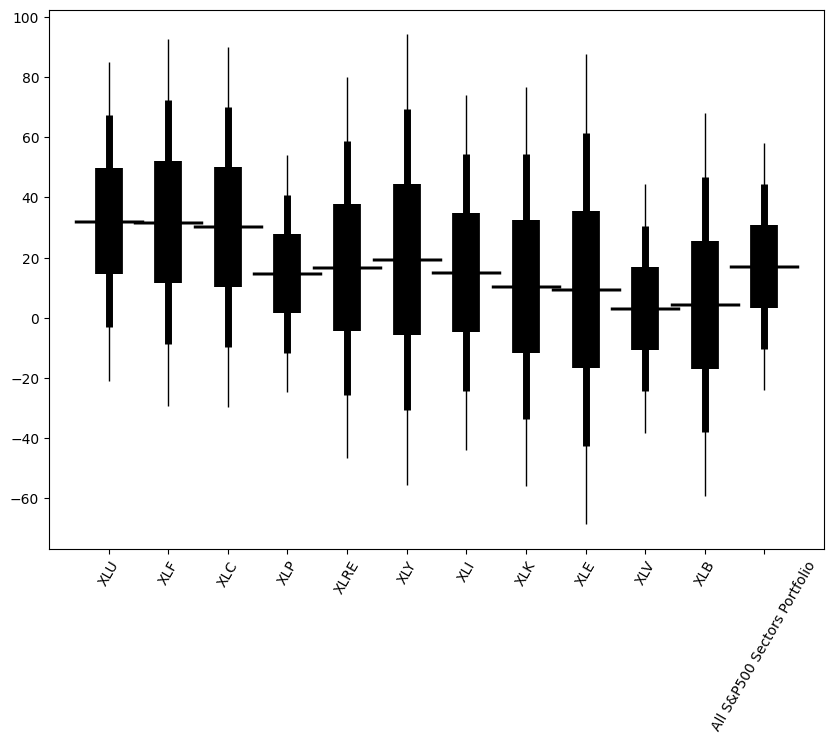

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

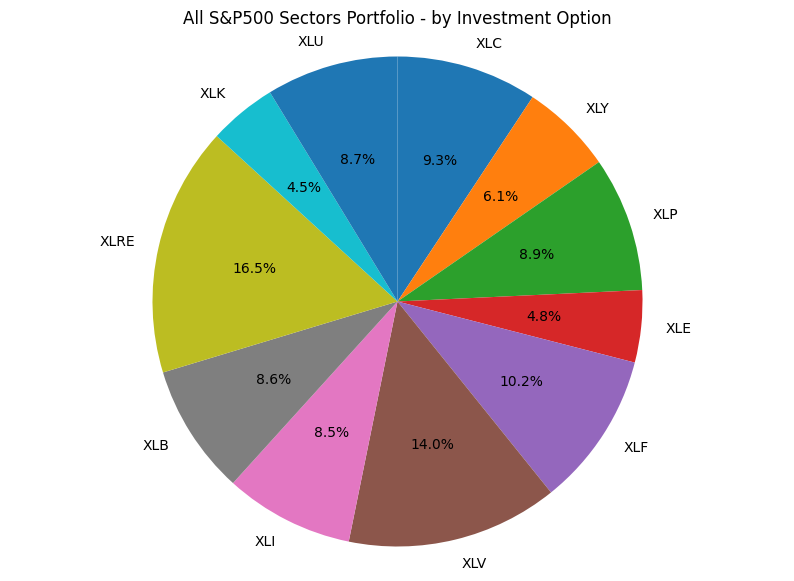

XLC    0.09
XLY    0.06
XLP    0.09
XLE    0.05
XLF    0.10
XLV    0.14
XLI    0.09
XLB    0.09
XLRE   0.16
XLK    0.04
XLU    0.09



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

All S&P500 Sectors Portfolio Weights:
    XLU                            0.0871
    XLF                            0.1021
    XLC                            0.0930
    XLP                            0.0889
    XLRE                           0.1647
    XLY                            0.0607
    XLI                            0.0852
    XLK                            0.0449
    XLE                            0.0476
    XLV                            0.1397
    XLB                            0.0861


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = False

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).